In [1]:
import osmnx as ox
import pandas as pd
import geopandas as gdp

import numpy as np
import networkx as nx
import os
import sys
import pickle
import re


import seaborn as sns

import matplotlib.pyplot as plt


from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.colors as colors

 

prjDir = "/home/charles/Projects/QcMtlStreets"
sys.path.append(os.path.join(prjDir, "Python"))   
os.path.isdir(os.path.join(prjDir, "Python"))
from OsmnxElev import *

In [2]:
shpQc=gpd.read_file(os.path.join(ROOT_DIR, "Data","GeoData","Neighbourhoods","vdq-quartier.shp"))
shpQc.head(2)

ID                  NOM   SUPERFICIE  PERIMETRE  \
0   1  Saint-Jean-Baptiste    678906.19    3781.17   
1   2            Cap-Rouge  12719875.43   19209.44   

                                            geometry  
0  POLYGON Z ((-71.21631942283598 46.812638240404...  
1  POLYGON Z ((-71.3937234763554 46.7584717847306...

In [3]:
shpMtl=gpd.read_file(os.path.join(ROOT_DIR, "Data","GeoData","MontrealNeighbourhoods","Quartiers_sociologiques_2014.shp"))
shpMtl.head(3)

id                Q_socio             Arrondisse Abrev  nbr_RUI  \
0   1               Ahuntsic  Ahuntsic-Cartierville   AHU        0   
1   2  Bordeaux-Cartierville  Ahuntsic-Cartierville   AHU        1   
2   3                  Anjou                  Anjou    AJ        0   

                                               Table  \
0                                Solidarité Ahuntsic   
1  Conseil local des intervenants communautaires ...   
2  Regroupement des organismes communautaires et ...   

                                            geometry  
0  POLYGON ((-73.698313 45.54687599999999, -73.69...  
1  (POLYGON ((-73.698313 45.54687599999999, -73.6...  
2  POLYGON ((-73.60235400000001 45.612587, -73.60...

In [4]:
shpMtl.plot()

In [5]:
graphMtl=loadGraphElevGradesNeighMtl()

File exists => reading graph


In [6]:
listNeighMtl=['Côte-des-Neiges',"Outremont","Le Plateau-Mont-Royal", "Peter McGill"]

graphQc3Neigh, shpQc3Neigh, dfPointsSubsetQc3Neigh= getInducedSubgraphNeigh(graphMtl, 
                                                                                shpMtl, 
                                                                                "Q_socio",
                                                                                listNeighMtl)

There are  0.23170112797341322  of points in the bounding box in neighbourhoods Côte-des-Neiges, Outremont, Le Plateau-Mont-Royal, Peter McGill


In [7]:
fig,ax=plotGraphGradeNeighMtl(listNeighMtl)

File exists => reading graph
There are  0.23170112797341322  of points in the bounding box in neighbourhoods Côte-des-Neiges, Outremont, Le Plateau-Mont-Royal, Peter McGill
Using absolute grades


File exists => reading graph
There are  0.24095083738519718  of points in the bounding box in neighbourhoods Côte-des-Neiges, Outremont, Notre-Dame-de-Grâce, Peter McGill
Using absolute grades


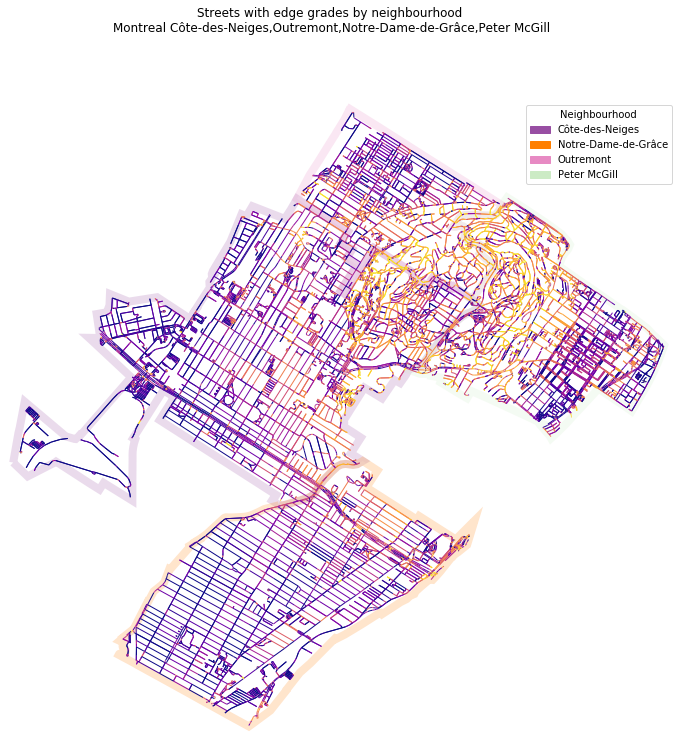

In [8]:
fig,ax=plotGraphGradeNeighMtl(['Côte-des-Neiges',"Outremont","Notre-Dame-de-Grâce", "Peter McGill"])

In [9]:
fig,ax=plotGraphGradeNeighMtl(['Côte-des-Neiges',"Outremont", "Peter McGill"])

File exists => reading graph
There are  0.18083591179215167  of points in the bounding box in neighbourhoods Côte-des-Neiges, Outremont, Peter McGill
Using absolute grades


File exists => reading graph
There are  0.07901543801057577  of points in the bounding box in neighbourhoods Peter McGill
Using absolute grades


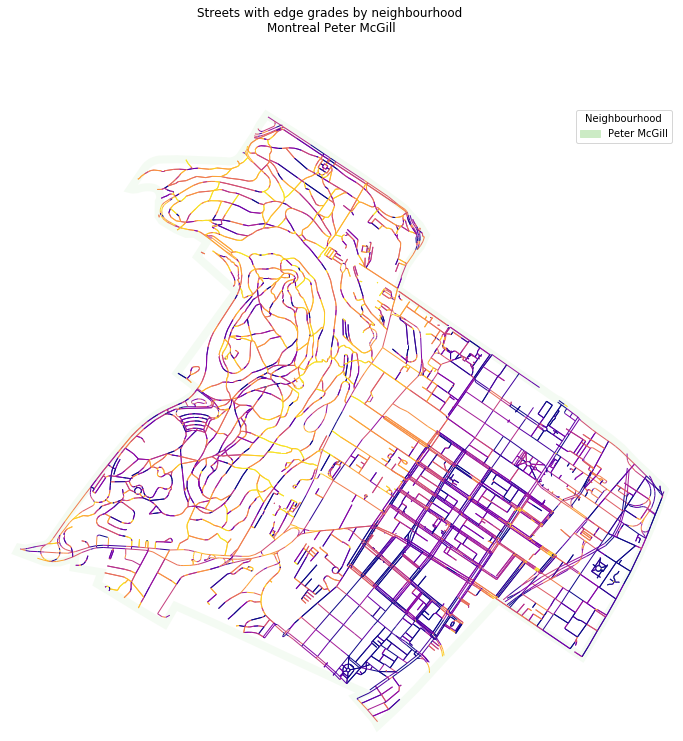

In [10]:
fig,ax=plotGraphGradeNeighMtl([ "Peter McGill"])

File exists => reading graph
There are  0.22010064526602005  of points in the bounding box in neighbourhoods Quartier 5-1, Notre-Dame-des-Laurentides, Lac-Saint-Charles
Using absolute grades


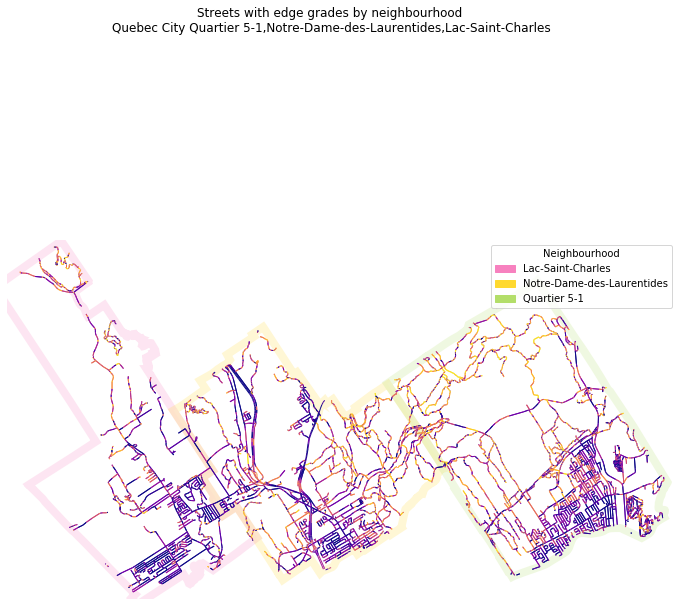

In [11]:
fig,ax=plotGraphGradeNeighQc([ "Quartier 5-1", "Notre-Dame-des-Laurentides","Lac-Saint-Charles"]) 

In plotKDEEdgeGradesByNeighFromDf_avg, considering column  gradeAbsoluteVal


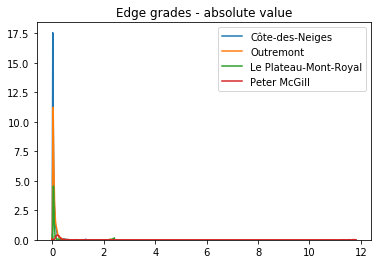

In [12]:
ax=plotEdgeGradesByNeighFromGraph_all(graphMtl, listNeighMtl,useAbsoluteGrade=True)
f=plt.gcf()
f.savefig(os.path.join(FIG_DIR, "EdgeGrades", "densityGradesAbsValue3NeighMtl.png"))

In [13]:
graphMtl3Neigh, shpMtl3Neigh, dfPointsSubsetMtl3Neigh= getInducedSubgraphNeigh(graphMtl, shp = shpMtl, listNeigh=listNeighMtl, varNameID="Q_socio")

There are  0.23170112797341322  of points in the bounding box in neighbourhoods Côte-des-Neiges, Outremont, Le Plateau-Mont-Royal, Peter McGill


In [14]:
ax=plotEdgeGradesByNeighFromGraph_avg(graphMtl3Neigh, listNeighMtl,useAbsoluteGrade=True)
f=plt.gcf()
f.savefig(os.path.join(FIG_DIR, "EdgeGrades", "gradeAbsAvgByNeigh3NeighMtl.png"))

In getDfEdgeGradeNeigh, here are the neighbourhood considered in the graph: Peter McGill,Outremont,Le Plateau-Mont-Royal,Côte-des-Neiges
In getDfEdgeGradeNeigh => removed  0  NA records
In getDfGradesGroupedNeighFromDf , here are the unique neighbouhoods: ['Côte-des-Neiges' 'Le Plateau-Mont-Royal' 'Outremont' 'Peter McGill']
In plotEdgeGradesByNeighFromDf_avg, considering column  gradeAbsoluteVal
In getDfEdgeGradeNeigh => removed  0  NA records
In getDfGradesGroupedNeighFromDf , here are the unique neighbouhoods: ['Côte-des-Neiges' 'Le Plateau-Mont-Royal' 'Outremont' 'Peter McGill']


In [21]:
ax=plotEdgeGradesByNeighFromGraph_avg(graphMtl, shpMtl.Q_socio,useAbsoluteGrade=True)
f=plt.gcf()
sns.set(rc={'figure.figsize':(25,25)})
ax.set_xlabel("Average street grade - absolute value", fontsize=20)
ax.set_ylabel("neighbourhood", fontsize=20)
ax.tick_params(labelsize=16)
f.savefig(os.path.join(FIG_DIR, "EdgeGrades", "gradeAbsAvgByNeighAllMtl.png"))

In getDfEdgeGradeNeigh, here are the neighbourhood considered in the graph: Petite-Patrie,Saint-Léonard,Nord-Ouest de lIle de Montréal,Le Plateau-Mont-Royal,Anjou,Saint-Laurent,Mercier-Ouest,Faubourg Saint-Laurent,Lachine,Mercier-Est,Rosemont,Outremont,Rivière-des-Prairies,Vieux-Montréal,Parc-Extension,LaSalle,Hochelaga-Maisonneuve,Ville-Émard/Côte Saint-Paul,Côte-des-Neiges,Notre-Dame-de-Grâce,Montréal-Nord,Verdun,Saint-Michel,Pointe Saint-Charles,Villeray,Centre-Sud,Ahuntsic,Pointe-aux-Trembles,Bordeaux-Cartierville,Petite-Bourgogne,Saint-Henri,Peter McGill
In getDfEdgeGradeNeigh => removed  0  NA records
In getDfGradesGroupedNeighFromDf , here are the unique neighbouhoods: ['Ahuntsic' 'Anjou' 'Bordeaux-Cartierville' 'Centre-Sud' 'Côte-des-Neiges'
 'Faubourg Saint-Laurent' 'Hochelaga-Maisonneuve' 'LaSalle' 'Lachine'
 'Le Plateau-Mont-Royal' 'Mercier-Est' 'Mercier-Ouest' 'Montréal-Nord'
 'Nord-Ouest de l\x92Ile de Montréal' 'Notre-Dame-de-Grâce' 'Outremont'
 'Parc-Extension' 'Peter M

In [16]:
 

fig,ax=plotGraphGrade(graphMtl)
fig.suptitle("Streets with edge grades - all Montreal neighbourhoods") 
fig.savefig(os.path.join(ROOT_DIR, "Figures", "EdgeGrades", "GraphWithEdgesAndNeighbourhoodsAllMtl.png"))
    

Using absolute grades


In [17]:
graphQc=loadGraphElevGradesNeighQc  ()
fig,ax=plotGraphGrade(graphQc)
fig.suptitle("Streets with edge grades - all Quebec neighbourhoods") 
fig.savefig(os.path.join(ROOT_DIR, "Figures", "EdgeGrades", "GraphWithEdgesAndNeighbourhoodsAllQc.png"))
    

File exists => reading graph
Using absolute grades
